# Create Graphics

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

BOOK_COUNT_CLEANED_DF = Path('./data/book_counts_cleaned.csv')

In [2]:
book_ranking = pd.read_csv(BOOK_COUNT_CLEANED_DF, index_col=0)

## Ranking by Posts and Comments

In [3]:
# Absolute ranking:
absolute_rank = pd.DataFrame(book_ranking.groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)
absolute_rank = pd.DataFrame(absolute_rank[['Occurrences']].reset_index())
absolute_rank

C:\Users\timwi\AppData\Local\Temp\ipykernel_18776\130709116.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  absolute_rank = pd.DataFrame(book_ranking.groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)


,Title,Normalized Title,Occurrences
0,Dune,dune,2306
1,1984,1984,2229
2,The Hunger Games,hungergames,1176
3,Infinite jest,infinitejest,1045
4,The Hobbit,hobbit,999
...,...,...,...
21333,Chasing Fire,chasingfire,1
21334,Silent prey,silentprey,1
21335,Silent messages,silentmessages,1
21336,Silent killer,silentkiller,1


In [4]:
def remove_synonyms(rank_df):
    synonyms = {('darktower', 'darktowers'), ('50shadesofgrey', 'fiftyshadesofgrey')}

    for syn1, syn2 in synonyms:
        count1 = rank_df.loc[rank_df['Normalized Title'] == syn1].values[0][2]
        count2 = rank_df.loc[rank_df['Normalized Title'] == syn2].values[0][2]
        title = rank_df.loc[rank_df['Normalized Title'] == syn1].values[0][0]
        new_col = pd.DataFrame([[title, syn1, count1+count2]], columns=['Title', 'Normalized Title', 'Occurrences'])

        rank_df = rank_df.drop(rank_df[rank_df['Normalized Title'] == syn1].index)
        rank_df = rank_df.drop(rank_df[rank_df['Normalized Title'] == syn2].index)

        rank_df = pd.concat([rank_df, new_col])

        rank_df.sort_values('Occurrences', ascending=False)

        rank_df = rank_df.sort_values('Occurrences', ascending=False)
        rank_df = rank_df.reset_index(drop=True)
        return rank_df[:100]

In [5]:
def plot_ranking(ranking, title, y_axis="Occurrences in Posts and Comments"):
    plt.rcParams["figure.dpi"] = 200
    plt.rcParams["figure.figsize"] = (5,5)

    p = ranking.sort_values(by='Occurrences').plot(kind='barh', x='Title', zorder=2)
    plt.suptitle(title, x=0.33, y=0.93, weight='bold')
    p.set_xlim(0, 2400)
    p.set_xlabel(y_axis, labelpad=10, size=8, fontstyle='italic')
    p.set_ylabel(None)

    vals = p.get_xticks()
    p.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    for tick in vals:
        p.axvline(x=tick, alpha=1, color='#eeeeee', zorder=1)

    p.tick_params(axis='y', which='both', bottom=False, top=False, left=False, labelbottom=False)

    p.spines['right'].set_visible(False)
    p.spines['top'].set_visible(False)
    p.spines['left'].set_visible(False)
    p.spines['bottom'].set_visible(False)
    p.get_legend().remove()

In [6]:
post_and_comments_ranked = remove_synonyms(absolute_rank)
post_and_comments_ranked.to_csv('./data/Top-100.csv')
post_and_comments_ranked

,Title,Normalized Title,Occurrences
0,Dune,dune,2306
1,1984,1984,2229
2,The Hunger Games,hungergames,1176
3,Infinite jest,infinitejest,1045
4,The Hobbit,hobbit,999
...,...,...,...
95,A Tale of Two Cities,taleoftwocities,191
96,The Sound and the Fury,soundandthefury,189
97,For Whom the Bell Tolls,forwhomthebelltolls,188
98,The haunting of Hill House,hauntingofhillhouse,188


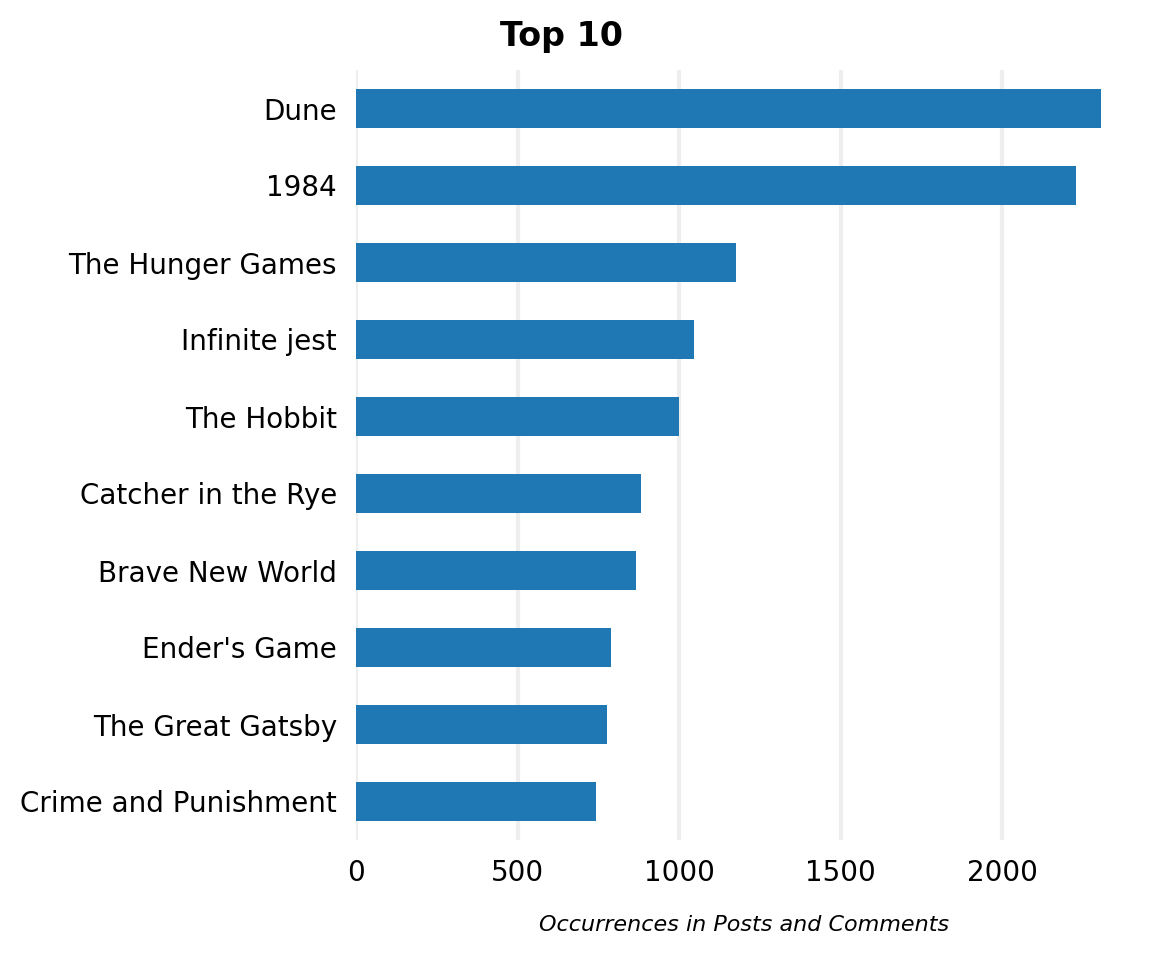

In [7]:
plot_ranking(post_and_comments_ranked[:10], 'Top 10')
plt.savefig('./Graphics/Top-10.png', bbox_inches='tight')

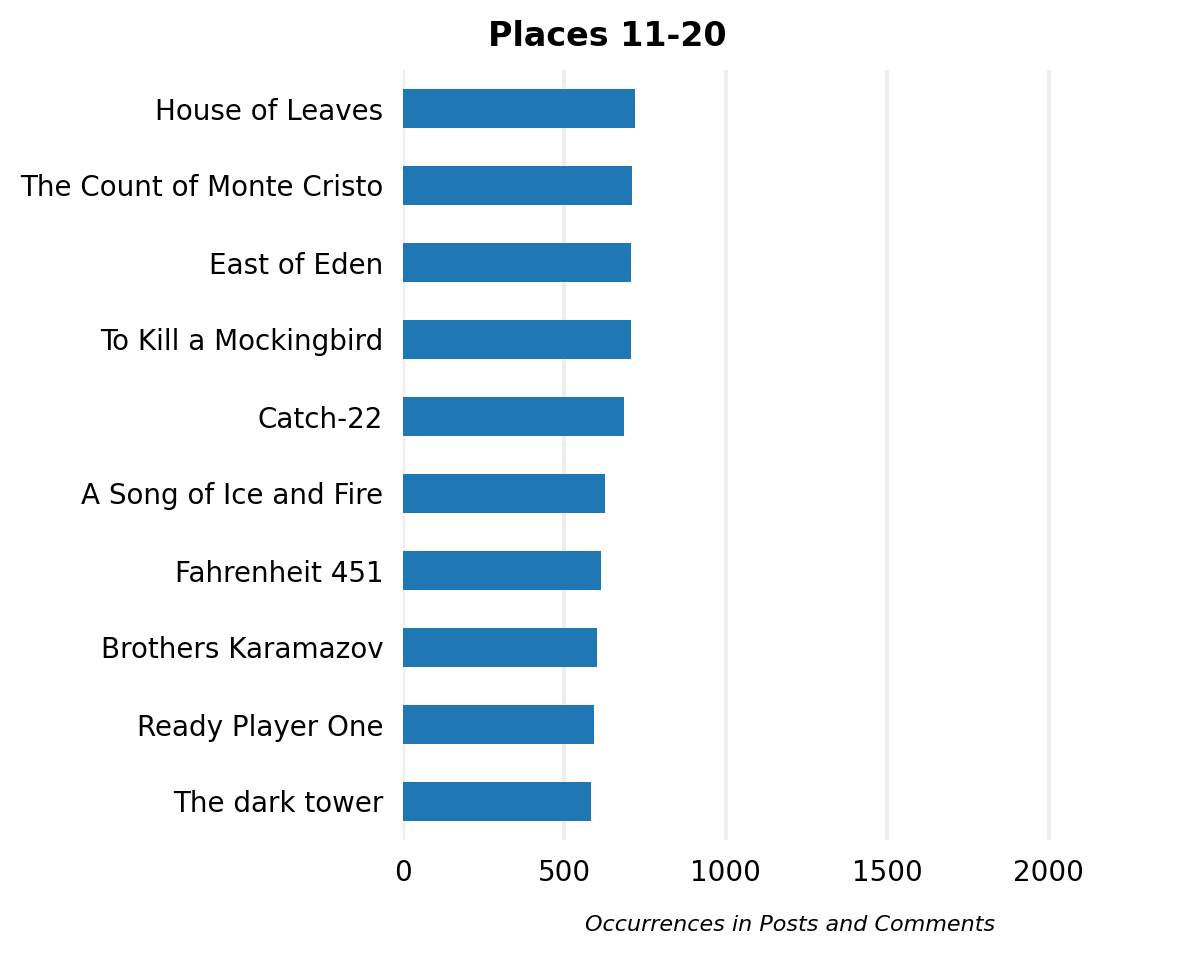

In [8]:
plot_ranking(post_and_comments_ranked[10:20], 'Places 11-20')
plt.savefig('./Graphics/Top11-20.png', bbox_inches='tight')

## Rank by Post Texts

In [9]:
post_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'post'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)
post_rank = pd.DataFrame(post_rank[['Occurrences']].reset_index())
post_rank

C:\Users\timwi\AppData\Local\Temp\ipykernel_18776\3565420198.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  post_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'post'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)


,Title,Normalized Title,Occurrences
0,Dune,dune,2104
1,1984,1984,2080
2,The Hunger Games,hungergames,1136
3,Infinite jest,infinitejest,1028
4,The Hobbit,hobbit,907
...,...,...,...
21333,Snowden Files,snowdenfiles,1
21334,Crier's War,crierswar,1
21335,Cricket in Times Square,cricketintimessquare,1
21336,So Dear to My Heart,sodeartomyheart,1


In [10]:
post_rank = remove_synonyms(post_rank)

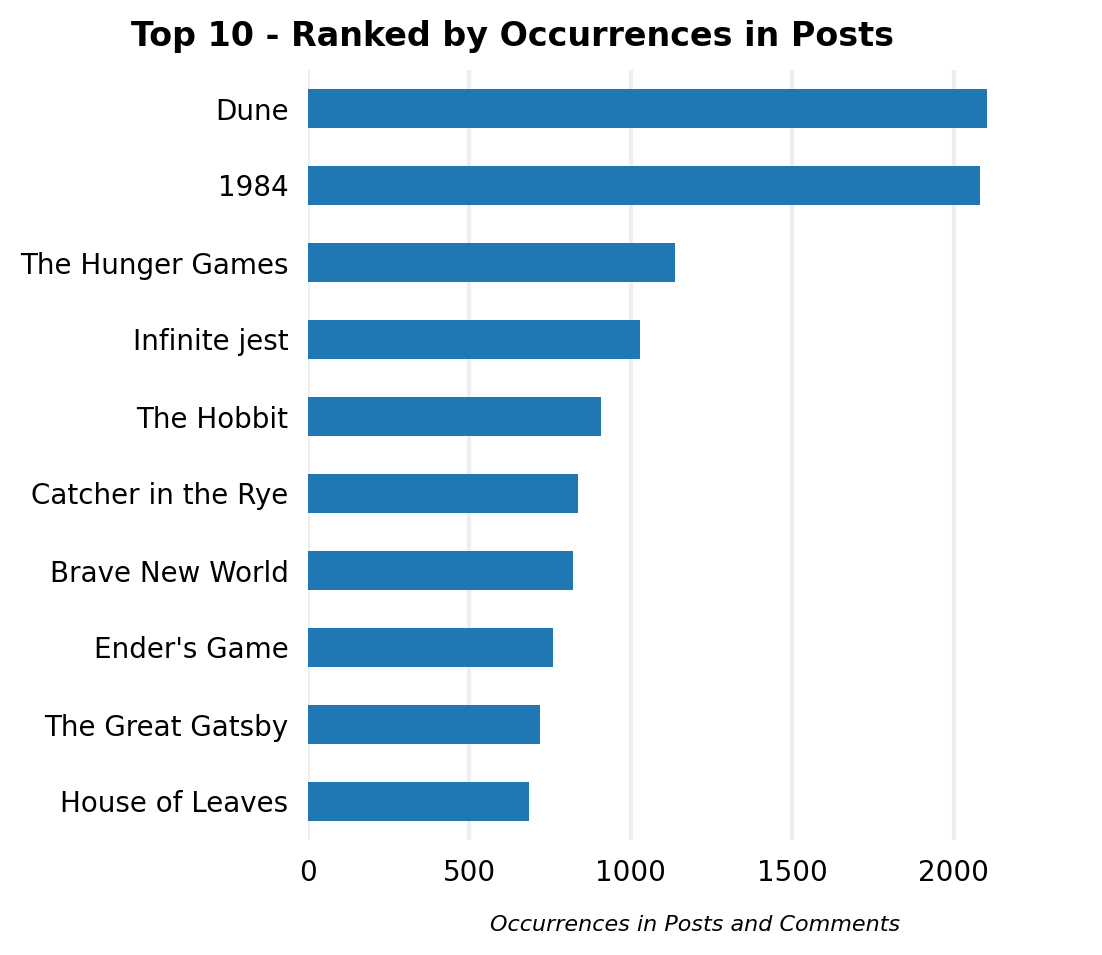

In [11]:
plot_ranking(post_rank[:10], 'Top 10 - Ranked by Occurrences in Posts')

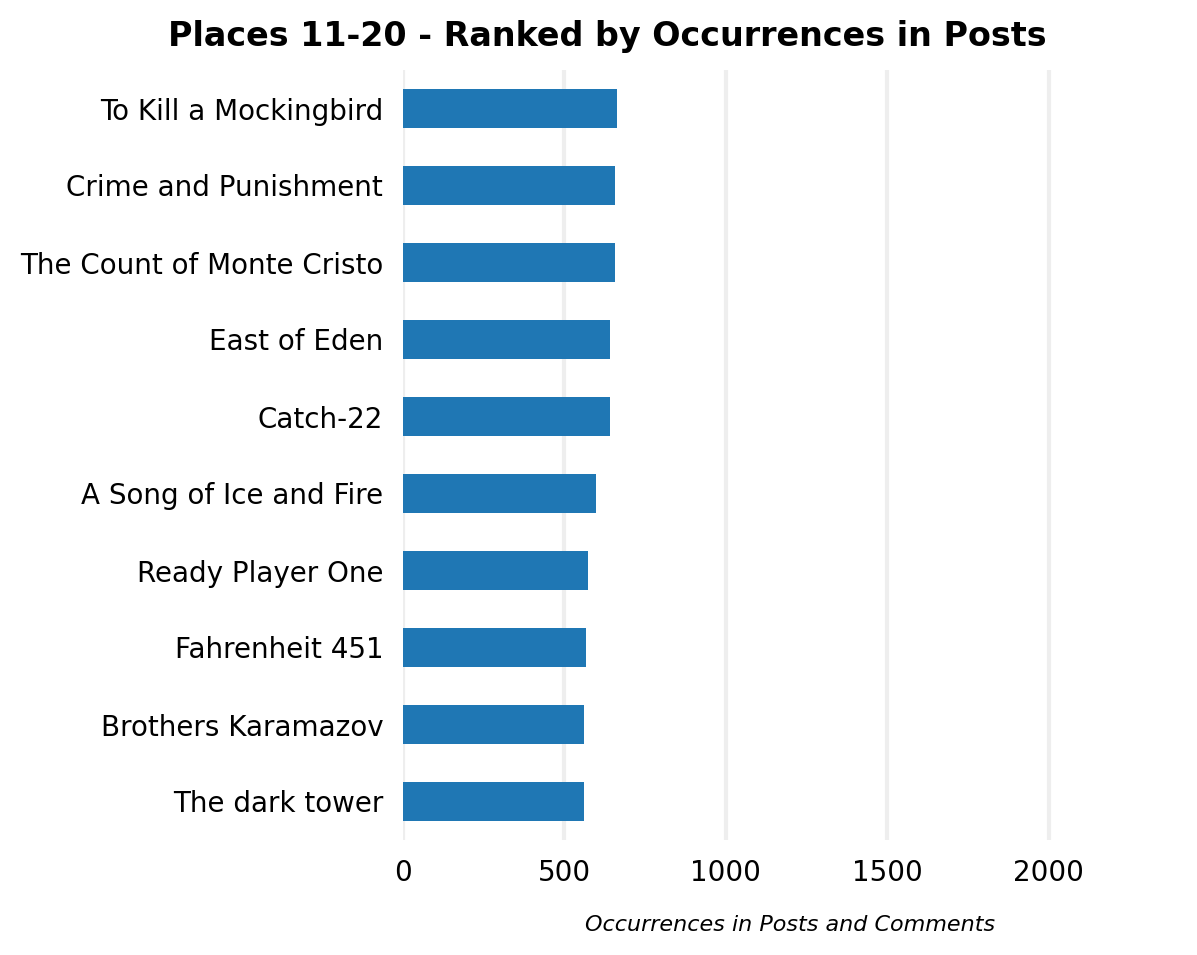

In [12]:
plot_ranking(post_rank[10:20], 'Places 11-20 - Ranked by Occurrences in Posts')

## Rank by Comments Texts

In [13]:
comment_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'comment'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)
comment_rank = pd.DataFrame(comment_rank[['Occurrences']].reset_index())
comment_rank

C:\Users\timwi\AppData\Local\Temp\ipykernel_18776\1945169134.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  comment_rank = pd.DataFrame(book_ranking[book_ranking['Post or Comment'] == 'comment'].groupby(['Title', 'Normalized Title']).sum()).sort_values('Occurrences', ascending=False)


,Title,Normalized Title,Occurrences
0,Dune,dune,202
1,1984,1984,149
2,The Hobbit,hobbit,92
3,A Little Life,littlelife,85
4,Crime and Punishment,crimeandpunishment,84
...,...,...,...
6558,Gargoyles,gargoyles,1
6559,Stiletto,stiletto,1
6560,Still Life,stilllife,1
6561,Garage band,garageband,1


In [14]:
comment_rank = remove_synonyms(comment_rank)

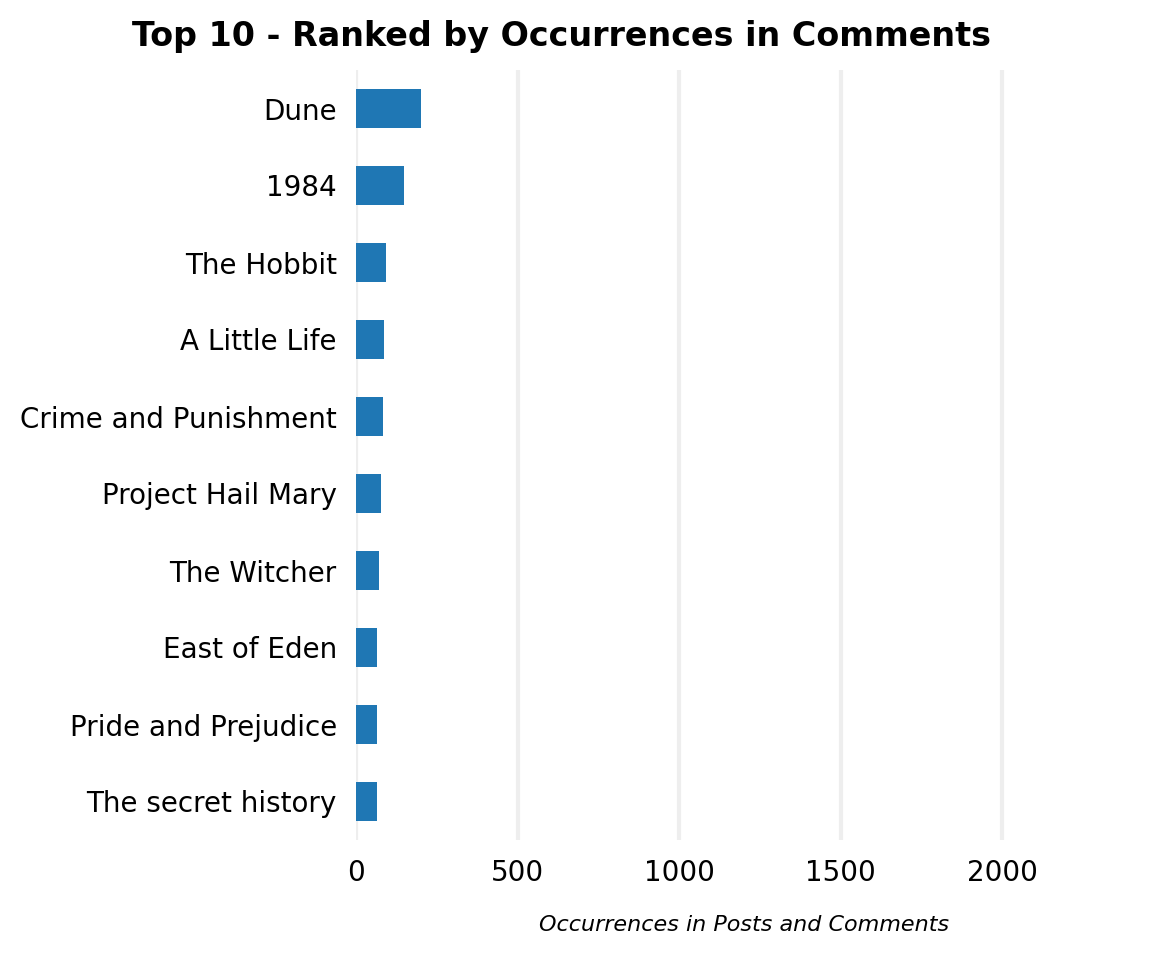

In [15]:
plot_ranking(comment_rank[:10], 'Top 10 - Ranked by Occurrences in Comments')

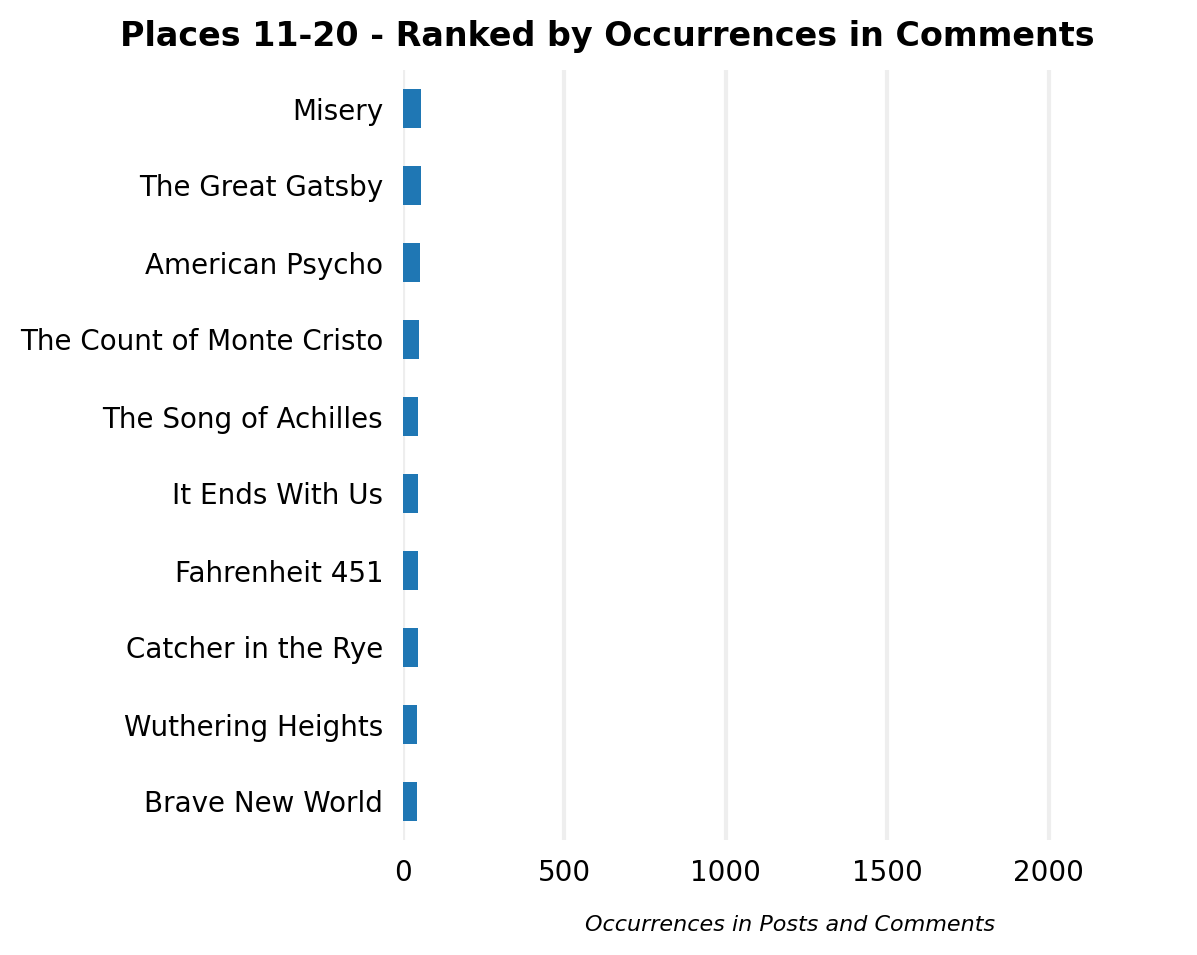

In [16]:
plot_ranking(comment_rank[10:20], 'Places 11-20 - Ranked by Occurrences in Comments')

## Top 100


In [17]:
post_and_comments_ranked.index += 1
top_100 = post_and_comments_ranked[:100][['Title', 'Occurrences']]
top_100

,Title,Occurrences
1,Dune,2306
2,1984,2229
3,The Hunger Games,1176
4,Infinite jest,1045
5,The Hobbit,999
...,...,...
96,A Tale of Two Cities,191
97,The Sound and the Fury,189
98,For Whom the Bell Tolls,188
99,The haunting of Hill House,188


In [18]:
# Create Markdown Table
print(top_100.to_markdown())

|     | Title                                |   Occurrences |
|----:|:-------------------------------------|--------------:|
|   1 | Dune                                 |          2306 |
|   2 | 1984                                 |          2229 |
|   3 | The Hunger Games                     |          1176 |
|   4 | Infinite jest                        |          1045 |
|   5 | The Hobbit                           |           999 |
|   6 | Catcher in the Rye                   |           882 |
|   7 | Brave New World                      |           866 |
|   8 | Ender's Game                         |           788 |
|   9 | The Great Gatsby                     |           778 |
|  10 | Crime and Punishment                 |           742 |
|  11 | House of Leaves                      |           719 |
|  12 | The Count of Monte Cristo            |           709 |
|  13 | To Kill a Mockingbird                |           708 |
|  14 | East of Eden                         |         